In [3]:
!pip install scikit-learn==1.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install xgboost==1.7.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [4]:
!pip install -U imbalanced-learn

#**DATA PREPARATION**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

In [7]:
url = 'https://drive.google.com/file/d/1Pxq-m3ekn1Ix163icab2XIpRKqzHNqwI/view?usp=sharing'
data = pd.read_csv(f"https://drive.google.com/uc?id={url.split('/')[-2]}")

#**Exploratory Data Analysis (EDA)**

In [8]:
data.shape

(27901, 18)

In [9]:
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [11]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [12]:
data.duplicated().sum()

0

Pengecekan Missing Value

In [13]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


#**Pre-Processing**

Penanganan Missing Value

In [14]:
# Penanganan missing value pada fitur 'Financial Stress' dengan mean
data['Financial Stress'] = data['Financial Stress'].fillna(data['Financial Stress'].mean())

In [15]:
# Pengecekan Kembali
data.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


Label Encoding

Mengkonversi variabel kategorikal menjadi numerik karena XGBoost hanya mendukung nilai numerik

In [16]:
for column in ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']:
    print(f"Unique values for {column}:")
    print(data[column].unique())
    print("\n")

Unique values for Gender:
['Male' 'Female']


Unique values for City:
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']


Unique values for Profession:
['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']


Unique values for Sleep Duration:
['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']


Unique values for Dietary Habits:
['Healthy' 'Moderate' 'Unhealthy' 'Others']


In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int64  
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  int64  
 4   Profession                             27901 non-null  int64  
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  int64  
 11  Di

In [18]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0


Correlation

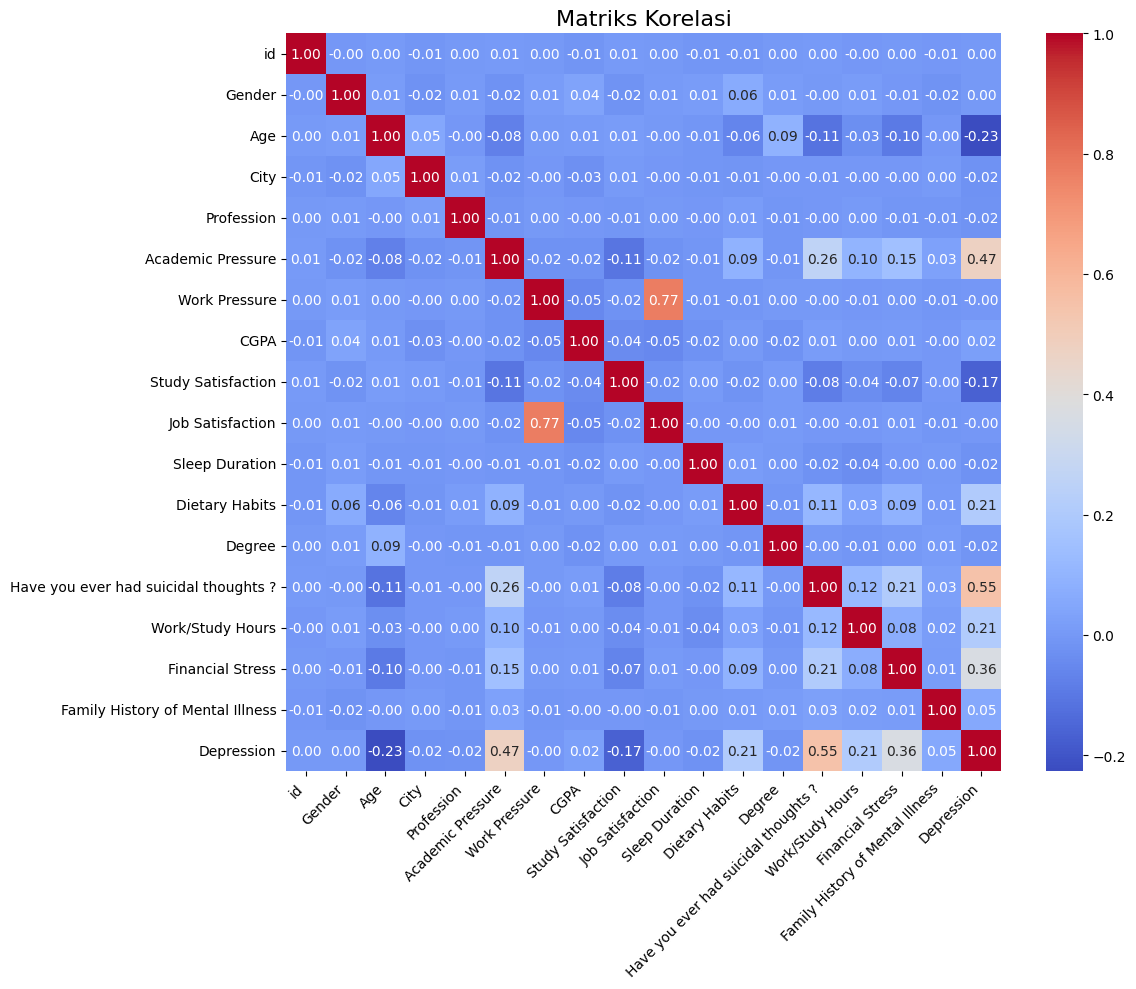

In [19]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Matriks Korelasi", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Cleaning Data

In [20]:
# Menghapus kolom yang tidak diperlukan
data = data.drop(['id', 'City', 'Profession', 'Work Pressure', 'Dietary Habits' ,'Degree'],axis=1)

In [21]:
data.shape

(27901, 12)

In [22]:
data.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,8.97,2.0,0.0,0,1,3.0,1.0,0,1
1,0,24.0,2.0,5.90,5.0,0.0,0,0,3.0,2.0,1,0
2,1,31.0,3.0,7.03,5.0,0.0,2,0,9.0,1.0,1,0
3,0,28.0,3.0,5.59,2.0,0.0,1,1,4.0,5.0,1,1
4,0,25.0,4.0,8.13,3.0,0.0,0,1,1.0,1.0,0,0


Menentukan data X dan Y

In [23]:
X = data.drop(['Depression'], axis=1)
y = data['Depression']

In [24]:
X

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,33.0,5.0,8.97,2.0,0.0,0,1,3.0,1.0,0
1,0,24.0,2.0,5.90,5.0,0.0,0,0,3.0,2.0,1
2,1,31.0,3.0,7.03,5.0,0.0,2,0,9.0,1.0,1
3,0,28.0,3.0,5.59,2.0,0.0,1,1,4.0,5.0,1
4,0,25.0,4.0,8.13,3.0,0.0,0,1,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,5.0,5.75,5.0,0.0,0,1,7.0,1.0,1
27897,1,27.0,2.0,9.40,3.0,0.0,2,0,0.0,3.0,1
27898,1,31.0,3.0,6.61,4.0,0.0,0,0,12.0,2.0,0
27899,0,18.0,5.0,6.88,2.0,0.0,2,1,10.0,5.0,0


In [25]:
y

,Depression
0,1
1,0
2,0
3,1
4,0
...,...
27896,0
27897,0
27898,0
27899,1


Normalisasi dataset

In [26]:
from sklearn.preprocessing import MinMaxScaler

X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)
X.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1.0,0.365854,1.0,0.897,0.4,0.0,0.00,1.0,0.250000,0.00,0.0
1,0.0,0.146341,0.4,0.590,1.0,0.0,0.00,0.0,0.250000,0.25,1.0
2,1.0,0.317073,0.6,0.703,1.0,0.0,0.50,0.0,0.750000,0.00,1.0
3,0.0,0.243902,0.6,0.559,0.4,0.0,0.25,1.0,0.333333,1.00,1.0
4,0.0,0.170732,0.8,0.813,0.6,0.0,0.00,1.0,0.083333,0.00,0.0


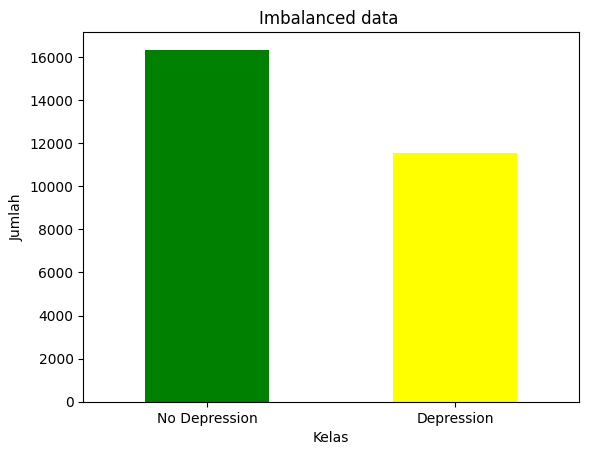

,count
Depression,
1,16336
0,11565


In [27]:
import matplotlib.pyplot as plt
y.value_counts().plot(kind='bar', color= ['green','yellow'])
plt.title('Imbalanced data ')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['No Depression', 'Depression'], rotation=0)
plt.show()

y.value_counts()

Balancing data menggunakan SMOTE

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

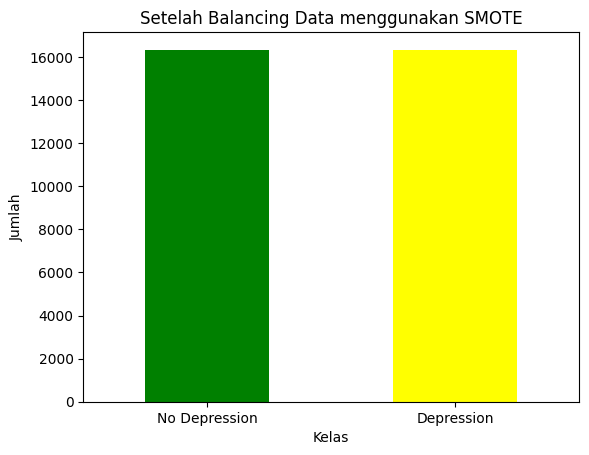

,count
Depression,
1,16336
0,16336


In [30]:
y.value_counts().plot(kind='bar', color= ['green', 'yellow'])
plt.title('Setelah Balancing Data menggunakan SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['No Depression', 'Depression'], rotation=0)
plt.show()

y.value_counts()

#**SPLITTING DATA**

In [31]:
from collections import Counter
from sklearn.model_selection import train_test_split

In [32]:
print(len(X))

32672


In [33]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran Data Latih: {X_train.shape}, Ukuran Data Uji: {X_test.shape}")

Ukuran Data Latih: (26137, 11), Ukuran Data Uji: (6535, 11)


In [34]:
print(X_train)

       Gender       Age  Academic Pressure      CGPA  Study Satisfaction  \
22367     1.0  0.219512                1.0  0.829000            0.400000   
221       0.0  0.365854                0.6  0.710000            0.800000   
17246     1.0  0.000000                1.0  0.588000            0.400000   
1107      1.0  0.048780                0.2  0.987000            0.800000   
27146     1.0  0.146341                0.6  0.689000            0.200000   
...       ...       ...                ...       ...                 ...   
29802     1.0  0.240968                0.6  0.535171            0.757594   
5390      1.0  0.048780                0.6  0.582000            0.200000   
860       1.0  0.000000                1.0  0.637000            0.600000   
15795     0.0  0.000000                0.6  0.721000            0.800000   
23654     1.0  0.390244                0.6  0.764000            0.800000   

       Job Satisfaction  Sleep Duration  \
22367               0.0            0.00   
2

In [35]:
print(y_train)

22367    0
221      0
17246    1
1107     0
27146    1
        ..
29802    0
5390     0
860      1
15795    0
23654    0
Name: Depression, Length: 26137, dtype: int64


#**Pengujian Model**

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [37]:
# Inisialisasi XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Melatih model
xgb_model.fit(X_train, y_train)

# Pengujian
y_pred = xgb_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Tampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Tampilkan classification report untuk evaluasi lebih lanjut
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8570772762050497
Precision: 0.8572738615522291
Recall: 0.8570772762050497
F1-Score: 0.8570656359594729

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3281
           1       0.85      0.87      0.86      3254

    accuracy                           0.86      6535
   macro avg       0.86      0.86      0.86      6535
weighted avg       0.86      0.86      0.86      6535



In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [39]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Menampilkan confusion matrix dalam bentuk tabel
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2777  504]
 [ 430 2824]]


Akurasi Model: 0.86
Precision: 0.86
Recall: 0.86
F1_Score: 0.86


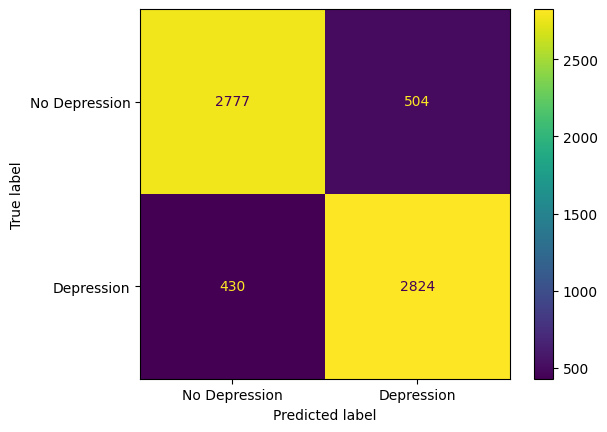

In [43]:
# Tampilkan hasil evaluasi
print(f"Akurasi Model: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1_Score: {f1:.2f}")


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Depression', 'Depression'])
disp.plot()
plt.show()

Percobaan lagi

In [46]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


**Hyperparameter Tuning**

In [47]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Fungsi tujuan untuk Optimasi
def objective(trial):
    # Hyperparameter yang akan dioptimasi
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.3),
        'reg_lambda': trial.suggest_float('reg_lambda', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'random_state': 42
    }

    # Model XGBoost
    model = XGBClassifier(**param, use_label_encoder=False, eval_metric='logloss')

    # Evaluasi dengan cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

# Mencari parameter terbaik
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Menampilkan parameter terbaik
print("Best Parameters:", study.best_params)

# Melatih model dengan parameter terbaik
best_params = study.best_params
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train, y_train)

# Evaluasi pada data uji
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy with best parameters:", accuracy)

[I 2025-01-18 15:46:35,805] A new study created in memory with name: no-name-350dc173-7155-41bb-9393-aac22e2bc9a6
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_la

Best Parameters: {'n_estimators': 166, 'max_depth': 3, 'learning_rate': 0.17536050385181398, 'subsample': 0.9570551532150708, 'colsample_bytree': 0.809934599475103, 'gamma': 0.2789231145541861, 'reg_lambda': 1.0259587161249655, 'reg_alpha': 0.984502709207129}

Accuracy with best parameters: 0.864575363427697


#**Deployment**

Simpan model untuk digunakan pada sistem produksi

Menyimpan Model

In [49]:
from xgboost import XGBClassifier

# Inisialisasi model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Melatih model
xgb_model.fit(X_train, y_train)  # Pastikan data X_train dan y_train sudah didefinisikan

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [50]:
# Menyimpan model yang sudah dilatih
xgb_model.save_model('xgboost_model.json')
print("Model saved to xgboost_model.json")

Model saved to xgboost_model.json


In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib

# Melatih model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluasi
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menyimpan model ke file
joblib.dump(xgb_model, 'xgboost_model.pkl')
print("Model saved to xgboost_model.pkl")

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8570772762050497
Model saved to xgboost_model.pkl


Memuat Model

In [54]:
# Memuat model
loaded_model = joblib.load('xgboost_model.pkl')

# Prediksi ulang
y_pred_loaded = loaded_model.predict(X_test)
print("Accuracy with loaded model:", accuracy_score(y_test, y_pred_loaded))

Accuracy with loaded model: 0.8570772762050497


In [56]:
from google.colab import files

# Unduh file model
xgb_model.save_model('xgboost_model_klasifikasi.json')

In [57]:
from google.colab import files

# Menyimpan model ke file JSON
xgb_model.save_model('xgboost_model_klasifikasi.json')

# Unduh file model
files.download('xgboost_model_klasifikasi.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
import joblib

# Simpan model ke file .pkl
joblib.dump(xgb_model, 'xgboost_model_klasifikasi.pkl')

['xgboost_model_klasifikasi.pkl']

In [60]:
from google.colab import files

# Unduh file .pkl
files.download('xgboost_model_klasifikasi.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>